In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime

In [2]:
data=pd.read_csv("netflix_titles.csv",encoding= 'iso-8859-1')

# Explore Data

In [3]:
data.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
4826,s4827,Movie,Maktub,Oded Raz,"Guy Amir, Hanan Savyon, Itzik Cohen, Igal Naor",Israel,"June 15, 2018",2018,TV-MA,106 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7156,s7157,Movie,K-19: The Widowmaker,Kathryn Bigelow,"Harrison Ford, Liam Neeson, Peter Sarsgaard, S...","United Kingdom, Germany, Canada, United States","November 21, 2019",2002,PG-13,138 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7451,s7452,Movie,MI-5,Bharat Nalluri,"Peter Firth, Kit Harington, Jennifer Ehle, Ely...",United Kingdom,"August 1, 2019",2015,R,105 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
414,s415,Movie,Chhota Bheem Aur Hanuman,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2012,TV-Y7,68 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1022,s1023,Movie,Taare Zameen Par,Aamir Khan,"Aamir Khan, Darsheel Safary, Tanay Chheda, Tis...",India,"April 17, 2021",2007,PG,162 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.shape

(8809, 26)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8809 non-null   object 
 1   type          8809 non-null   object 
 2   title         8809 non-null   object 
 3   director      6175 non-null   object 
 4   cast          7984 non-null   object 
 5   country       7978 non-null   object 
 6   date_added    8799 non-null   object 
 7   release_year  8809 non-null   int64  
 8   rating        8805 non-null   object 
 9   duration      8806 non-null   object 
 10  listed_in     8809 non-null   object 
 11  description   8809 non-null   object 
 12  Unnamed: 12   0 non-null      float64
 13  Unnamed: 13   0 non-null      float64
 14  Unnamed: 14   0 non-null      float64
 15  Unnamed: 15   0 non-null      float64
 16  Unnamed: 16   0 non-null      float64
 17  Unnamed: 17   0 non-null      float64
 18  Unnamed: 18   0 non-null    

# Clean Data

In [6]:
# drop columns index 12 to 25
data.drop(data.columns[12:26], axis=1, inplace=True)

In [7]:
#Feature data
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [8]:
#Check duplicated
data.duplicated().sum()

0

In [9]:
#Check null each columns
nan=data.isna().sum().sort_values()
nan/len(data)*100

,0
show_id,0.000000
type,0.000000
title,0.000000
release_year,0.000000
listed_in,0.000000
description,0.000000
duration,0.034056
rating,0.045408
date_added,0.113520
cast,9.365422


In [10]:
#Drop any null
data.dropna(how="any",inplace=True)

# **Analysis Data**

In [11]:
#Check shape data after drop
data.shape

(5334, 12)

In [12]:
data.sample(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5934,s5935,Movie,Mitt,Greg Whiteley,Mitt Romney,United States,"January 24, 2014",2014,TV-PG,93 min,Documentaries,The real Mitt Romney is revealed in this docum...
3472,s3473,Movie,Rugrats in Paris: The Movie,"Stig Bergqvist, Paul Demeyer","Elizabeth Daily, Tara Strong, Cheryl Chase, Ch...","Germany, United States","October 1, 2019",2000,G,79 min,"Children & Family Movies, Comedies",The Rugrats take to the big screen and visit P...


In [13]:
#release_year column unique
data["release_year"].unique()

array([1993, 2021, 1998, 2010, 2013, 2017, 1975, 1978, 1983, 1987, 2012,
       2001, 2002, 2003, 2004, 2011, 2008, 2009, 2007, 2005, 2006, 2018,
       2020, 2019, 1994, 2015, 1982, 1989, 2014, 1990, 1991, 1999, 2016,
       1986, 1996, 1984, 1997, 1980, 1961, 1995, 1985, 1992, 2000, 1976,
       1959, 1988, 1972, 1981, 1964, 1954, 1979, 1958, 1956, 1963, 1970,
       1973, 1960, 1974, 1966, 1971, 1962, 1969, 1977, 1967, 1968, 1965,
       1945, 1946, 1955, 1942, 1947, 1944, 2024])

In [14]:
# The most frequent among year
data["release_year"].value_counts().nlargest(60)

,count
release_year,
2017,657
2018,648
2016,577
2019,519
2020,442
2015,349
2014,243
2013,197
2012,163


In [15]:
#Type column unique
data["type"].unique()

array(['Movie', 'TV Show'], dtype=object)

Unique Type column :Movie - TV Show

In [16]:
# The most frequent between Movie and TV Show
data["type"].value_counts().sort_values(ascending=False)

,count
type,
Movie,5186
TV Show,148


Movie greater than TV Show

In [17]:
# director column nunique
data["director"].nunique()

3946

Nunique director column: 4529

In [18]:
#Top 60 for director
data["director"].value_counts().nlargest(60)

,count
director,
"RaÃºl Campos, Jan Suter",18
Marcus Raboy,15
Jay Karas,14
Cathy Garcia-Molina,13
Jay Chapman,12
Martin Scorsese,12
Youssef Chahine,12
Steven Spielberg,11
Don Michael Paul,10


In [19]:
#country Column nunique
data["country"].nunique()

604

Nunique country Column : 748

In [20]:
#Top 60 for country
data["country"].value_counts().nlargest(60)

,count
country,
United States,1847
India,875
United Kingdom,183
Canada,107
Spain,91
Egypt,90
Nigeria,88
Japan,83
Turkey,79


In [21]:
#rating column unique
data["rating"].unique()

array(['TV-MA', 'TV-14', 'PG-13', 'PG', 'R', 'TV-PG', 'G', 'TV-Y7',
       'TV-G', 'TV-Y', 'NC-17', 'NR', 'TV-Y7-FV', 'UR', 'A'], dtype=object)

In [22]:
#Top 60 for rating
rating_count=data["rating"].value_counts().nlargest(60)
rating_count

,count
rating,
TV-MA,1823
TV-14,1214
R,778
PG-13,470
TV-PG,431
PG,275
TV-G,84
TV-Y7,76
TV-Y,76


In [23]:
data["listed_in"].nunique()

337

In [24]:
data["listed_in"].value_counts().nlargest(60)

,count
listed_in,
"Dramas, International Movies",336
Stand-Up Comedy,286
"Comedies, Dramas, International Movies",257
"Dramas, Independent Movies, International Movies",243
"Children & Family Movies, Comedies",179
"Dramas, International Movies, Romantic Movies",160
Documentaries,156
"Comedies, International Movies",152
"Comedies, International Movies, Romantic Movies",143


In [25]:
#use regular regression
data["categories"] = data["listed_in"].str.extract(r"(^[A-Za-z]+(?:\s&?\s?[A-Za-z]+)?)")


In [26]:
# value categories column
categories_count=data["categories"].value_counts()
categories_count

,count
categories,
Dramas,1518
Comedies,1127
Action & Adventure,806
Children & Family,469
Documentaries,372
Stand,293
Horror Movies,261
International Movies,109
Classic Movies,73


In [27]:
#change name stand to stand-up
data["categories"] = data["categories"].str.replace("Stand","Stand-Up")
#change name Dramas to Drama
data["categories"] = data["categories"].str.replace("Dramas","Drama")
#change name TV Drama to Drama
data["categories"] = data["categories"].str.replace("TV Drama","Drama")
#change name TV Comedies to Comedies
data["categories"] = data["categories"].str.replace("TV Comedies","Comedies")
#change name TV Sci to Sci
data["categories"] = data["categories"].str.replace("TV Sci","Sci")


In [28]:
# value categories column
categories_count=data["categories"].value_counts()
categories_count

,count
categories,
Drama,1520
Comedies,1130
Action & Adventure,806
Children & Family,469
Documentaries,372
Stand-Up,293
Horror Movies,261
International Movies,109
Classic Movies,73


In [29]:
data["duration"].unique()

array(['125 min', '9 Seasons', '104 min', '127 min', '166 min', '103 min',
       '97 min', '106 min', '96 min', '124 min', '116 min', '98 min',
       '91 min', '115 min', '122 min', '99 min', '88 min', '100 min',
       '102 min', '93 min', '95 min', '85 min', '83 min', '182 min',
       '147 min', '90 min', '128 min', '143 min', '119 min', '114 min',
       '118 min', '108 min', '117 min', '121 min', '142 min', '113 min',
       '154 min', '120 min', '82 min', '94 min', '109 min', '101 min',
       '105 min', '86 min', '229 min', '76 min', '89 min', '110 min',
       '156 min', '112 min', '129 min', '107 min', '1 Season', '135 min',
       '136 min', '165 min', '150 min', '133 min', '145 min', '92 min',
       '2 Seasons', '64 min', '59 min', '111 min', '87 min', '148 min',
       '189 min', '141 min', '130 min', '7 Seasons', '68 min', '131 min',
       '126 min', '155 min', '123 min', '84 min', '4 Seasons', '13 min',
       '77 min', '74 min', '49 min', '72 min', '78 min', '70 min'

In [30]:
data['date_added'] = data['date_added'].str.strip()
data["date_added"] = pd.to_datetime(data["date_added"])

In [32]:
data['Year'] = data['date_added'].dt.year.astype(str)
data['Month'] = data['date_added'].dt.month.astype(str)
data['Day'] = data['date_added'].dt.day.astype(str)


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5334 entries, 7 to 8808
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       5334 non-null   object        
 1   type          5334 non-null   object        
 2   title         5334 non-null   object        
 3   director      5334 non-null   object        
 4   cast          5334 non-null   object        
 5   country       5334 non-null   object        
 6   date_added    5334 non-null   datetime64[ns]
 7   release_year  5334 non-null   int64         
 8   rating        5334 non-null   object        
 9   duration      5334 non-null   object        
 10  listed_in     5334 non-null   object        
 11  description   5334 non-null   object        
 12  categories    5334 non-null   object        
 13  Year          5334 non-null   object        
 14  Month         5334 non-null   object        
 15  Day           5334 non-null   object       

In [34]:
data["Year"].unique()

array(['2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014',
       '2013', '2012', '2011', '2009', '2008', '2010', '2024'],
      dtype=object)

In [35]:
data["duration"] = data["duration"].str.replace("min","")

In [36]:
data["duration"].value_counts().nlargest(60)
#data["duration"].value_counts(ascending=False)

,count
duration,
94,135
93,130
97,129
95,127
90,123
91,117
102,112
96,109
92,109


In [37]:
data["Season"]= data["duration"]

In [38]:
specific_seasons = ["1 Season","7 Seasons", "8 Seasons","15 Seasons", "5 Seasons", "9 Seasons", "3 Seasons", "2 Seasons", "6 Seasons", "4 Seasons"]
filtered_data = data[data['Season'].isin(specific_seasons)]
group_Seasons = filtered_data.groupby("Season").agg({
    'rating': 'sum',
    'country': 'nunique',
    'categories': 'nunique',
     "type": 'unique' ,
     "Year": 'unique' ,
     "director": 'nunique'
})


In [39]:
group_Seasons

,rating,country,categories,type,Year,director
Season,,,,,,
1 Season,TV-MATV-MATV-MATV-14TV-MATV-GTV-MATV-MATV-PGTV...,38,12,[TV Show],"[2021, 2020, 2019, 2018, 2017, 2016, 2013, 201...",103
15 Seasons,TV-14,1,1,[TV Show],[2020],1
2 Seasons,TV-MATV-MATV-MATV-14TV-YTV-MATV-MATV-MATV-MATV...,13,8,[TV Show],"[2021, 2020, 2019, 2017, 2016]",18
3 Seasons,TV-MATV-MATV-MA,3,3,[TV Show],"[2015, 2017]",3
4 Seasons,TV-14TV-MATV-14TV-14,4,3,[TV Show],"[2021, 2020, 2017]",4
5 Seasons,TV-14TV-14TV-Y7TV-MATV-14TV-PG,4,5,[TV Show],"[2020, 2019, 2018, 2016]",6
6 Seasons,TV-14TV-14TV-14,3,3,[TV Show],"[2021, 2019, 2018]",3
7 Seasons,TV-14,1,1,[TV Show],[2021],1
8 Seasons,TV-14TV-PG,1,2,[TV Show],"[2020, 2017]",2


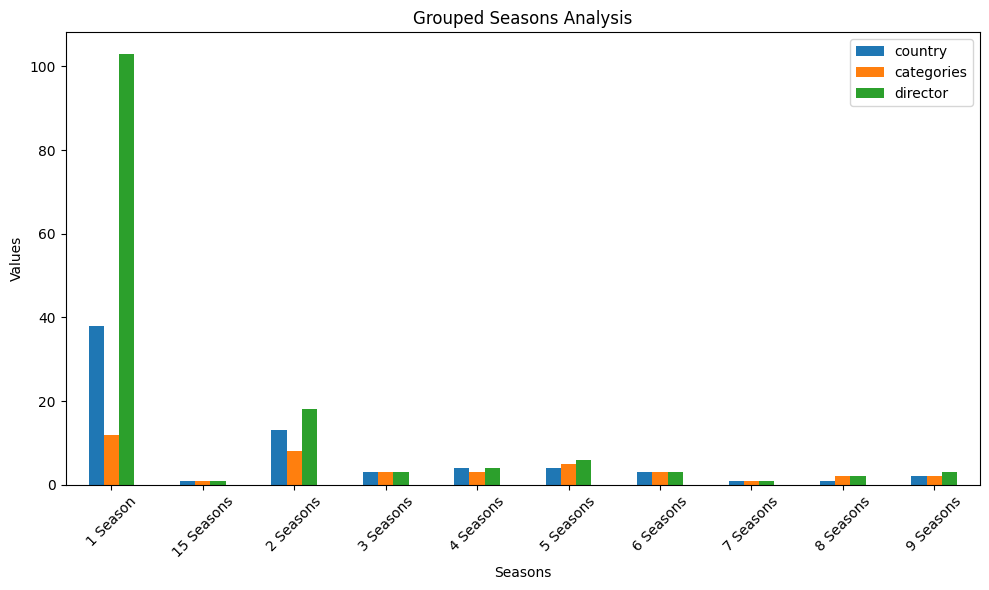

In [40]:
group_Seasons.plot(kind='bar', figsize=(10, 6))
plt.title('Grouped Seasons Analysis')
plt.xlabel('Seasons')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

<ipython-input-41-5389ef3f9e5f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['release_year'])


<Axes: xlabel='release_year', ylabel='Density'>

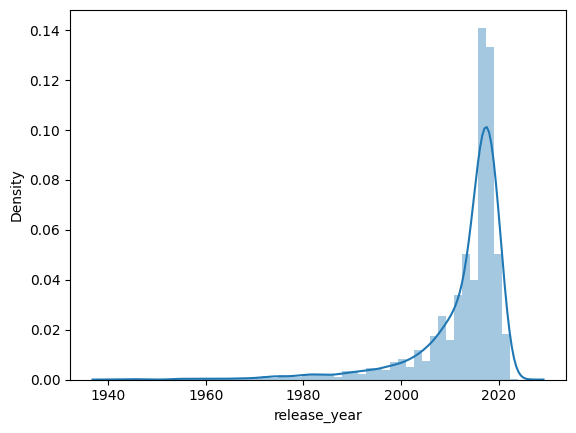

In [41]:
# Distplot release_year column know type
sns.distplot(data['release_year'])

In [42]:
from scipy.stats import skew

# Calculate skewness
skewness = data['release_year'].skew()

print(f"Skewness: {skewness}")
if skewness > 0:
    print("The data is right-skewed (positively skewed).")
elif skewness < 0:
    print("The data is left-skewed (negatively skewed).")
else:
    print("The data is symmetrical.")


Skewness: -2.7683935367014603
The data is left-skewed (negatively skewed).


In [43]:
data["release_year"].describe()

,release_year
count,5334.000000
mean,2012.744469
std,9.625275
min,1942.000000
25%,2011.000000
50%,2016.000000
75%,2018.000000
max,2024.000000


# Compare between Movie and TV Show

In [44]:
px.pie(data_frame=data,names='type',title='Distribution Type' )

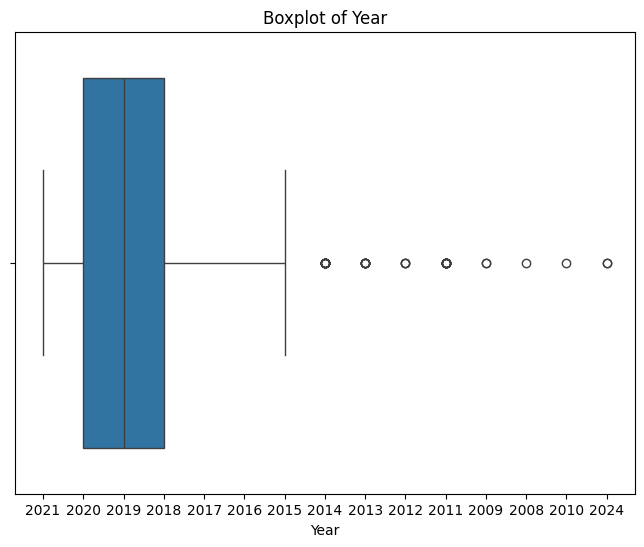

In [45]:
#Boxplot year
plt.figure(figsize=(8, 6))
sns.boxplot(x='Year', data=data)
plt.title('Boxplot of Year')
plt.show()

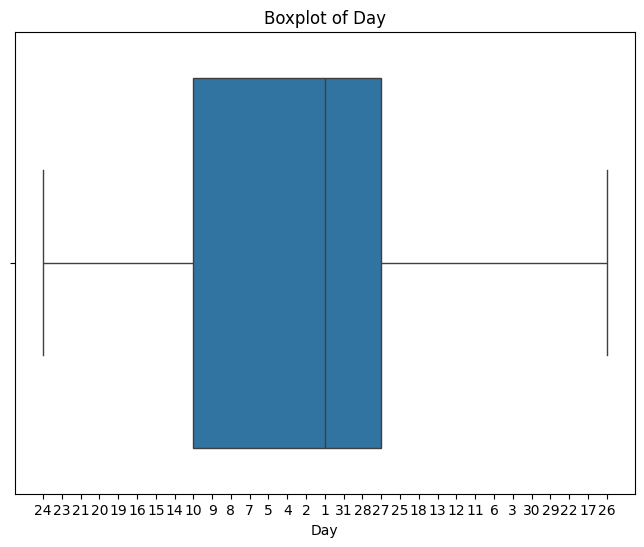

In [46]:
#Boxplot day
plt.figure(figsize=(8, 6))
sns.boxplot(x='Day', data=data)
plt.title('Boxplot of Day')
plt.show()

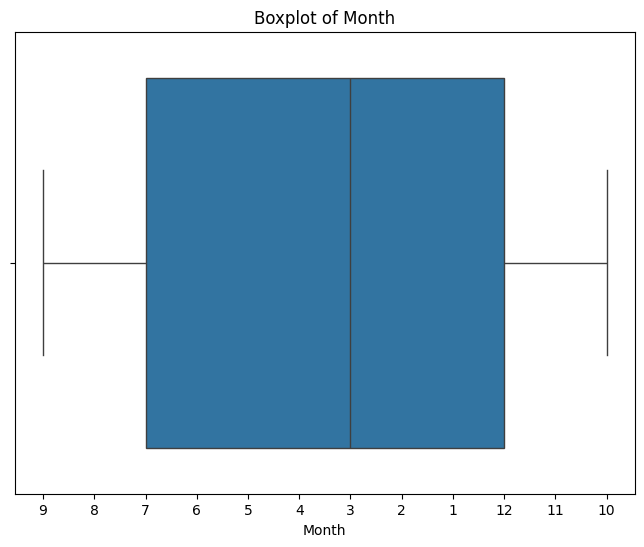

In [47]:
#Boxplot month
plt.figure(figsize=(8, 6))
sns.boxplot(x='Month', data=data)
plt.title('Boxplot of Month')
plt.show()

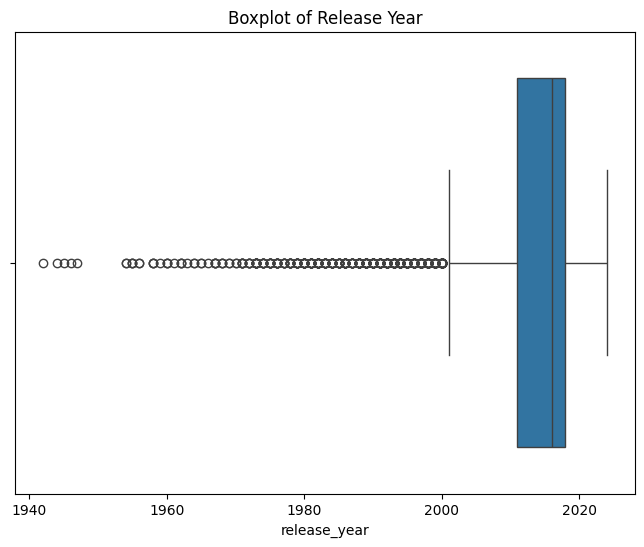

In [48]:
#Boxplot release year
plt.figure(figsize=(8, 6))
sns.boxplot(x='release_year', data=data)
plt.title('Boxplot of Release Year')
plt.show()

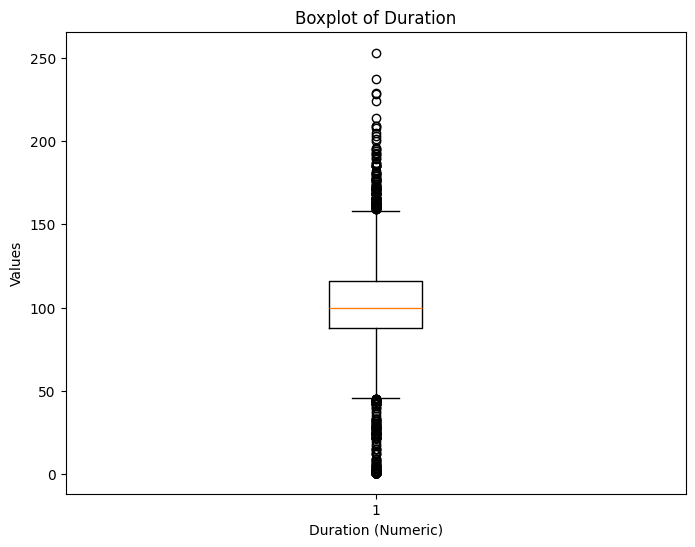

In [49]:
data['duration_numeric'] = pd.to_numeric(data['duration'].str.extract('(\d+)')[0], errors='coerce')
cleaned_data = data.dropna(subset=['duration_numeric'])

plt.figure(figsize=(8, 6))
plt.boxplot(cleaned_data['duration_numeric'])
plt.title("Boxplot of Duration")
plt.xlabel("Duration (Numeric)")
plt.ylabel("Values")
plt.show()


In [50]:
#Top 10 for country
Top10_country=data["country"].value_counts().nlargest(10)
Top10_country

,count
country,
United States,1847
India,875
United Kingdom,183
Canada,107
Spain,91
Egypt,90
Nigeria,88
Japan,83
Turkey,79


<ipython-input-51-f6176db0628f>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




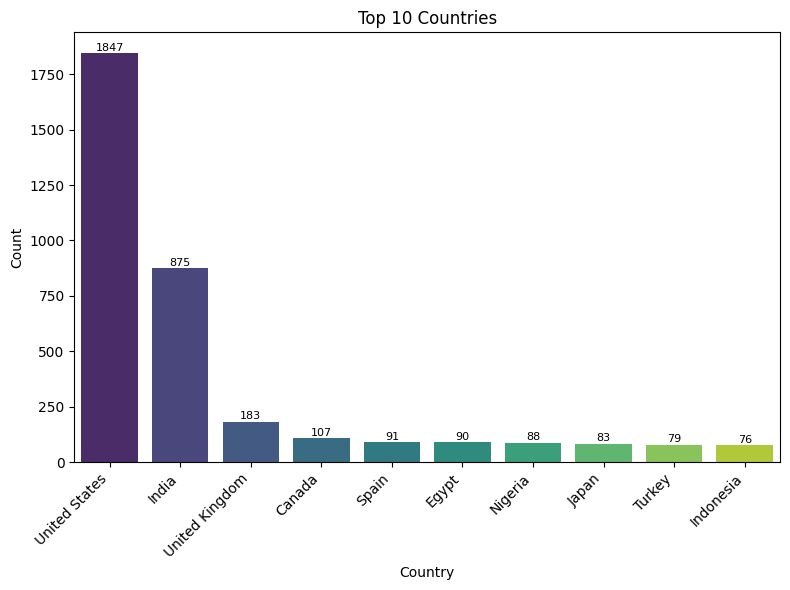

In [51]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=Top10_country.index, y=Top10_country.values, palette="viridis")
plt.title("Top 10 Countries")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
for i, v in enumerate(Top10_country.values):
    ax.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.show()

In [52]:
fig = px.bar(data_frame=Top10_country, text_auto=True, title='Top 10 Distribution Movies Country')
fig.show()

<ipython-input-53-d378bb5ac149>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




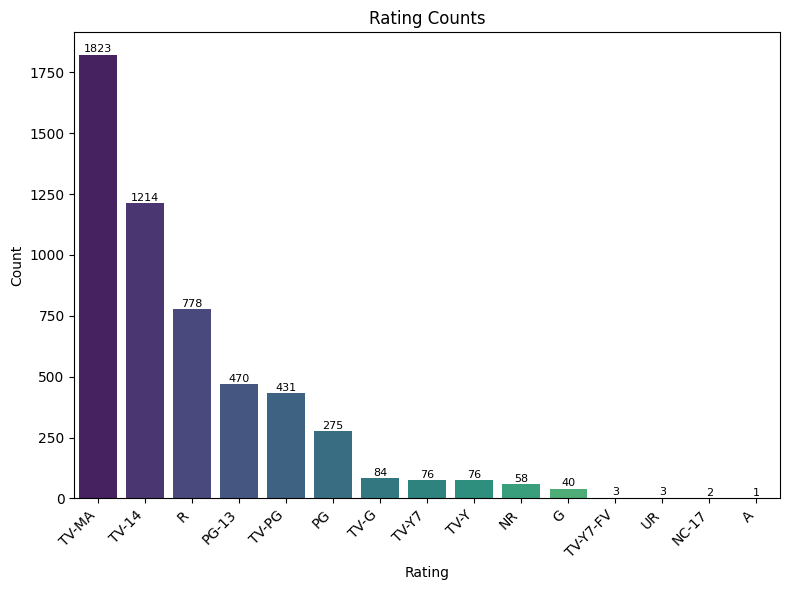

In [53]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=rating_count.index, y=rating_count.values, palette="viridis")
plt.title("Rating Counts")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
for i, v in enumerate(rating_count.values):
    ax.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.show()

In [54]:
px.bar(data_frame=rating_count ,text_auto=True, title='Distribution Rating Movies' )

In [55]:
px.bar(data_frame=categories_count ,text_auto=True, title='Distribution Type Movies' )


<Axes: xlabel='Month', ylabel='rating'>

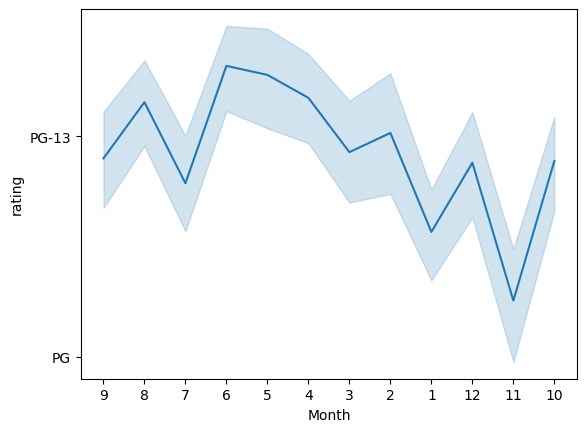

In [56]:
sns.lineplot(data=data, x='Month', y='rating')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, '9'),
  Text(1, 0, '8'),
  Text(2, 0, '7'),
  Text(3, 0, '6'),
  Text(4, 0, '5'),
  Text(5, 0, '4'),
  Text(6, 0, '3'),
  Text(7, 0, '2'),
  Text(8, 0, '1'),
  Text(9, 0, '12'),
  Text(10, 0, '11'),
  Text(11, 0, '10')])

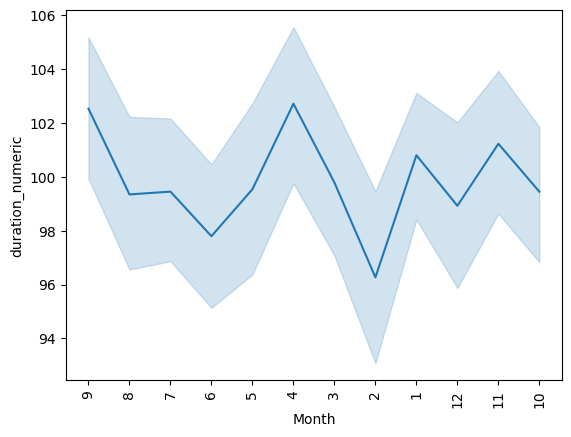

In [57]:
sns.lineplot(data=data, x='Month', y='duration_numeric')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, '9'),
  Text(1, 0, '8'),
  Text(2, 0, '7'),
  Text(3, 0, '6'),
  Text(4, 0, '5'),
  Text(5, 0, '4'),
  Text(6, 0, '3'),
  Text(7, 0, '2'),
  Text(8, 0, '1'),
  Text(9, 0, '12'),
  Text(10, 0, '11'),
  Text(11, 0, '10')])

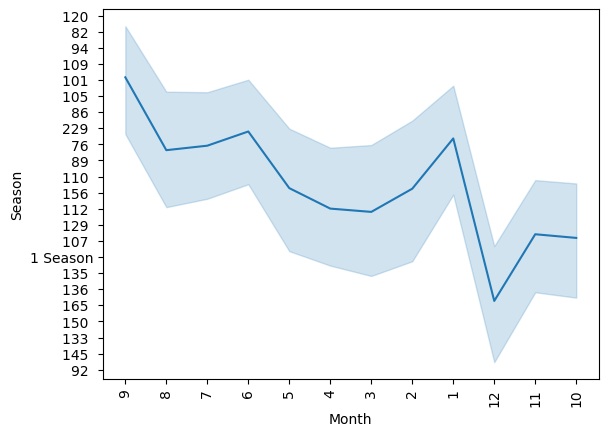

In [58]:
sns.lineplot(data=data, x='Month', y='Season')
plt.xticks(rotation=90)

In [59]:
top_10_director= data["director"].value_counts()
print(top_10_director)

director
RaÃºl Campos, Jan Suter          18
Marcus Raboy                     15
Jay Karas                        14
Cathy Garcia-Molina              13
Jay Chapman                      12
                                 ..
Igor Kovalyov, Norton Virgien     1
Danny Cannon                      1
Mana Yasuda                       1
Gupse Ãzay                       1
Yeon Sang-ho                      1
Name: count, Length: 3946, dtype: int64


In [60]:
top_10_director = top_10_director.sort_values(ascending=False).head(10)
px.bar(data_frame=top_10_director, text_auto=True, title='Top 10 Distribution Director Movies')

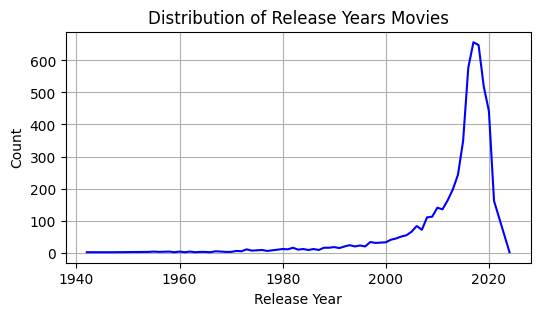

In [61]:
release_year_counts = data['release_year'].value_counts().sort_index()
plt.figure(figsize=(6, 3))
release_year_counts.plot(kind='line', color='blue')
plt.title('Distribution of Release Years Movies')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [62]:
content_type = data.groupby(['release_year', 'type']).size().unstack(fill_value=0)
content_type = content_type.reset_index()
fig = px.line(
    content_type,
    x='release_year',
    y=['Movie', 'TV Show'],
    labels={'value': 'Count', 'variable': 'Content Type'},
    title='Movie, TV Shows and Total Released Each Year'
)
fig.show()
